In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# تحميل البيانات
# تحميل بيانات MNIST: صور أرقام بالأبيض والأسود (28x28).

# نقوم بتطبيع الصور (Normalize) لقيم بين 0 و 1.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# تحويل الصور إلى حجم 32x32 وRGB لتتوافق مع VGG16
# تغيير حجم الصور لتتوافق مع VGG16 (التي تتطلب 32x32x3)
# x_train[..., tf.newaxis]: إضافة بعد جديد لقناة اللون (من 28x28 إلى 28x28x1).

# tf.image.resize(..., [32, 32]): تغيير الحجم من 28x28 إلى 32x32.

# tf.repeat(..., 3, axis=-1): تكرار قناة الرمادي 3 مرات لجعل الصورة RGB.
x_train = tf.image.resize(x_train[..., tf.newaxis], [32, 32])
x_train = tf.repeat(x_train, 3, axis=-1)
x_test = tf.image.resize(x_test[..., tf.newaxis], [32, 32])
x_test = tf.repeat(x_test, 3, axis=-1)

# تحويل التصنيفات إلى One-Hot Encoding
#لتحويل الأرقام من مثل 3 إلى [0, 0, 0, 1, 0, ..., 0] لكي تتوافق مع softmax.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# تحميل نموذج VGG16 بدون الطبقة العلوية
# استخدام VGG16 المدرب مسبقًا على ImageNet، مع حذف الطبقة الأخيرة (fully connected).

# تجميد طبقات VGG16 حتى لا يتم تدريبها (للاستفادة من الخصائص المستخرجة فقط).
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # تجميد الطبقات

# إضافة طبقات جديدة
# GlobalAveragePooling2D: لتحويل خرائط الميزات إلى متجه.

# Dense(128): طبقة مخفية.

# Dense(10): إخراج لـ10 تصنيفات باستخدام softmax.
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# تجميع النموذج
# استخدام Adam كـ optimizer.

# categorical_crossentropy لأن لدينا تصنيفات متعددة.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# تدريب النموذج
# التدريب لـ5 دورات.

# تقسيم 20% من البيانات للتقييم أثناء التدريب.

# history يخزن معلومات عن الأداء (loss/accuracy) للتدريب والتحقق (validation).
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# اختبار النموذج
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.7340 - loss: 0.9496 - val_accuracy: 0.9277 - val_loss: 0.2572
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9322 - loss: 0.2354 - val_accuracy: 0.9473 - val_loss: 0.1750
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9487 - loss: 0.1717 - val_accuracy: 0.9538 - val_loss: 0.1515
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9566 - loss: 0.1411 - val_accuracy: 0.9589 - val_loss: 0.1341
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9643 - loss: 0.1193 - val_accuracy: 0.9607 - val_loss: 0.1229
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9622 - loss: 0.1244
Test Accuracy: 0.9652000069618225


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9658 - loss: 0.1107 - val_accuracy: 0.9629 - val_loss: 0.1174
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9681 - loss: 0.1043 - val_accuracy: 0.9640 - val_loss: 0.1104
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9708 - loss: 0.0955 - val_accuracy: 0.9631 - val_loss: 0.1159
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9715 - loss: 0.0888 - val_accuracy: 0.9645 - val_loss: 0.1131
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9733 - loss: 0.0865 - val_accuracy: 0.9667 - val_loss: 0.1084
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9741 - loss: 0.0810 - val_accuracy: 0.9673 - val_loss: 0.1009
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9761 - loss: 0.0797 - val_accuracy: 0.9697 - val_loss: 0.0957
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9741 - loss: 0.0797 - val

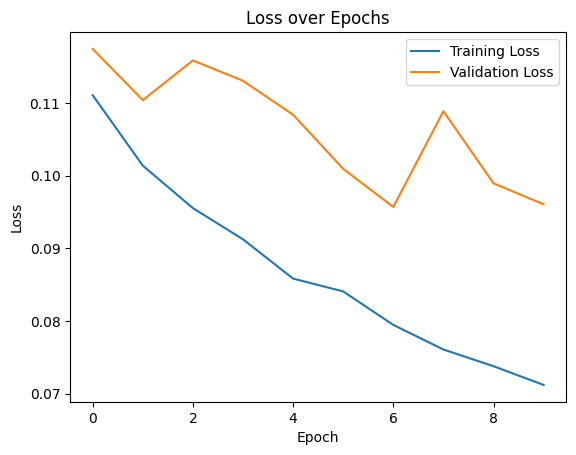

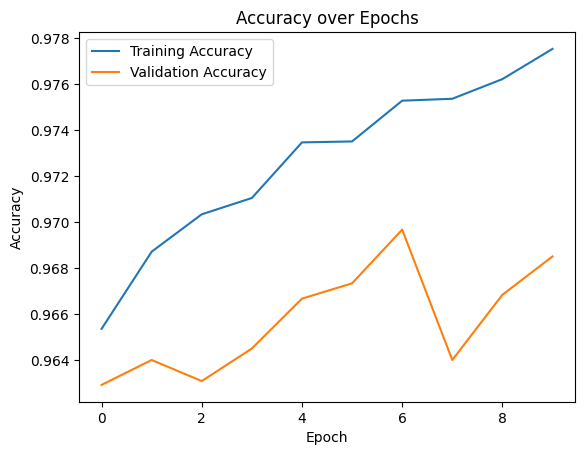

In [5]:
import matplotlib.pyplot as plt

# رسم الخسارة
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# رسم الدقة
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

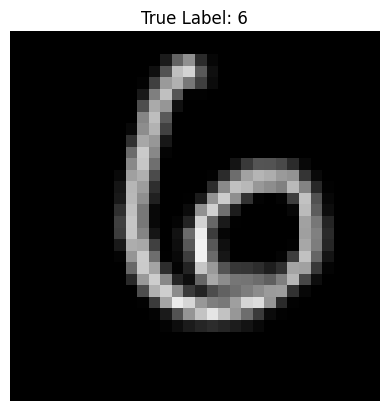

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 6


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# اختر صورة من بيانات الاختبار (مثلاً الصورة رقم 100)
index = 100
image = x_test[index]
label = np.argmax(y_test[index])  # التصنيف الصحيح

# عرض الصورة
# image هو Tensor من نوع tf.Tensor وليس مصفوفة NumPy، وبالتالي لا يملك دالة .astype().
#plt.imshow(image.numpy().astype("float32"))
plt.imshow(np.array(image))
plt.title(f"True Label: {label}")
plt.axis("off")
plt.show()

# أضف بعد batch (1, 32, 32, 3)
image_batch = tf.expand_dims(image, axis=0)

# التنبؤ
prediction = model.predict(image_batch)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

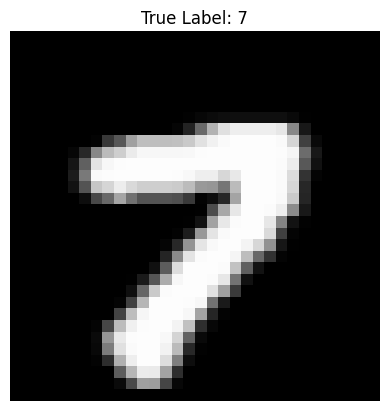

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Label: 7


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# اختر صورة من بيانات الاختبار (مثلاً الصورة رقم 100)
index = 79
image = x_test[index]
label = np.argmax(y_test[index])  # التصنيف الصحيح

# عرض الصورة
# image هو Tensor من نوع tf.Tensor وليس مصفوفة NumPy، وبالتالي لا يملك دالة .astype().
#plt.imshow(image.numpy().astype("float32"))
plt.imshow(np.array(image))
plt.title(f"True Label: {label}")
plt.axis("off")
plt.show()

# أضف بعد batch (1, 32, 32, 3)
image_batch = tf.expand_dims(image, axis=0)

# التنبؤ
prediction = model.predict(image_batch)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

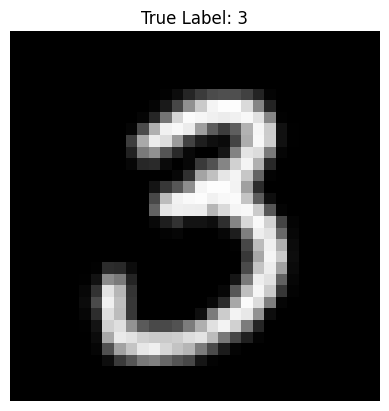

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label: 3


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# اختر صورة من بيانات الاختبار
index = 90
image = x_test[index]
label = np.argmax(y_test[index])  # التصنيف الصحيح

# عرض الصورة
# image هو Tensor من نوع tf.Tensor وليس مصفوفة NumPy، وبالتالي لا يملك دالة .astype().
#plt.imshow(image.numpy().astype("float32"))
plt.imshow(np.array(image))
plt.title(f"True Label: {label}")
plt.axis("off")
plt.show()

# هذا السطر يقوم بإضافة بُعد إضافي (batch dimension) إلى الصورة المفردة، بحيث تصبح جاهزة للإدخال إلى النموذج model.predict() الذي يتوقع بيانات على شكل دفعة (batch).
# أضف بعد batch (1, 32, 32, 3)
image_batch = tf.expand_dims(image, axis=0)

# التنبؤ
prediction = model.predict(image_batch)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

In [ ]:
# لماذا نحتاج إلى Batch Dimension؟
# نموذج model.predict() في Keras يتوقع أن تكون البيانات مجموعة من الصور وليس صورة واحدة فقط.
# البُعد	الوصف
# batch_size	عدد الصور المُدخلة في نفس الوقت
# height	ارتفاع الصورة
# width	عرض الصورة
# channels	عدد القنوات (مثل 3 لقنوات RGB)


# قبل استخدام expand_dims
# عند اختيار صورة مفردة من x_test، فإن شكلها يكون:
# image.shape  # (32, 32, 3)
# وهذا يعني:

# صورة واحدة فقط.

# الحجم: 32x32.

# القنوات: 3 (لأننا حولناها إلى RGB سابقًا).

# لكن النموذج يتوقع:

# (batch_size, 32, 32, 3)
# ما الذي يفعله tf.expand_dims(image, axis=0)؟
# هو ببساطة يُضيف بُعد جديد في الموضع رقم 0 (أي في البداية)، فيصبح الشكل هكذا:
# image_batch.shape  # (1, 32, 32, 3)
# هذا يعني:

# Batch يحتوي على صورة واحدة.

# الآن النموذج يمكنه استقبال هذه الصورة ضمن Batch والتنبؤ بها.